#### Nama: Millata Tasyakhanifa
#### Username: millatasyaa
#### Email: millatatasyakhanifa@gmail.com

## Import library

In [1]:
import pandas as pd
from pandas import DataFrame 

# Library to extract files
import os
import zipfile

# Library to display images
%matplotlib inline
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Library to using Image Generator
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

## Extract the zip file

In [2]:
local_zip = '/content/Satellite_Image.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

## Create a folder for cloud image data

In [3]:
cloudy_folder = os.path.join('/content/data/cloudy')

# Show the total number of images in the cloud folder
len_cloudy_folder = len(os.listdir(cloudy_folder))
print("Total paper pictures:", len_cloudy_folder)

# Show 5 data in the cloudy folder
cloudy = os.listdir(cloudy_folder)
print("5 data in the cloudy folder:")
i=0
cloudy_temp = []
for file_cloudy in cloudy[:5]:
  cloudy_temp.append(file_cloudy)
  i=i+1
data_cloudy = {'File Name': cloudy_temp}
df_cloudy = pd.DataFrame(data_cloudy,
                           index=[1,2,3,4,5])
df_cloudy.head()

Total paper pictures: 1500
5 data in the cloudy folder:


,File Name
1,train_11805.jpg
2,train_16387.jpg
3,train_25815.jpg
4,train_37942.jpg
5,train_28743.jpg


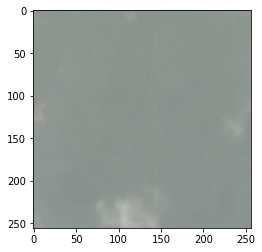

In [4]:
image_cloud = image.load_img('/content/data/cloudy/train_14090.jpg')
image_cloud_plot = plt.imshow(image_cloud)

## Create a folder for desert image data

In [5]:
desert_folder = os.path.join('/content/data/desert')

# Show the total number of images in the desert folder
len_desert_folder = len(os.listdir(desert_folder))
print("Total desert pictures:", len_desert_folder)

# Show 5 data in the desert folder
desert = os.listdir(desert_folder)
print("5 data in the desert folder:")
i=0
desert_temp = []
for file_desert in desert[:5]:
  desert_temp.append(file_desert)
  i=i+1
data_desert = {'File Name': desert_temp}
df_desert = pd.DataFrame(data_desert,
                           index=[1,2,3,4,5])
df_desert.head()

Total desert pictures: 1131
5 data in the desert folder:


,File Name
1,desert(723).jpg
2,desert(178).jpg
3,desert(576).jpg
4,desert(905).jpg
5,desert(331).jpg


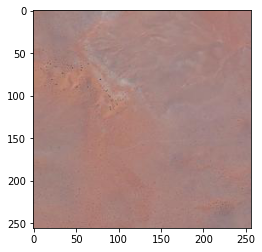

In [6]:
image_desert = image.load_img('/content/data/desert/desert(248).jpg')
image_desert_plot = plt.imshow(image_desert)

## Create a folder for green area image data

In [7]:
green_area_folder = os.path.join('/content/data/green_area')

# Show the total number of images in the green area folder
len_green_area_folder = len(os.listdir(green_area_folder))
print("Total green area pictures:", len_green_area_folder)

# Show 5 data in the green area folder
green_area = os.listdir(green_area_folder)
print("5 data in the green area folder:")
i=0
green_area_temp = []
for file_green_area in green_area[:5]:
  green_area_temp.append(file_green_area)
  i=i+1
data_green_area = {'File Name': green_area_temp}
df_green_area = pd.DataFrame(data_green_area,
                           index=[1,2,3,4,5])
df_green_area.head()

Total green area pictures: 1500
5 data in the green area folder:


,File Name
1,Forest_729.jpg
2,Forest_2141.jpg
3,Forest_2875.jpg
4,Forest_2882.jpg
5,Forest_400.jpg


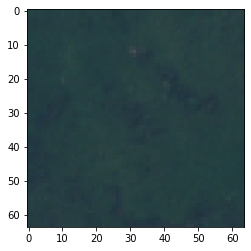

In [8]:
image_green_area = image.load_img('/content/data/green_area/Forest_2315.jpg')
image_green_area_plot = plt.imshow(image_green_area)

## Create a folder for water image data

In [9]:
water_folder = os.path.join('/content/data/water')

# Show the total number of images in the water folder
len_water_folder = len(os.listdir(water_folder))
print("Total water pictures:", len_water_folder)

# Show 5 data in the water folder
water = os.listdir(water_folder)
print("5 data in the water folder:")
i=0
water_temp = []
for file_water in water[:5]:
  water_temp.append(file_water)
  i=i+1
data_water = {'File Name': water_temp}
df_water = pd.DataFrame(data_water,
                           index=[1,2,3,4,5])
df_water.head()

Total water pictures: 1500
5 data in the water folder:


,File Name
1,SeaLake_813.jpg
2,SeaLake_1329.jpg
3,SeaLake_955.jpg
4,SeaLake_1479.jpg
5,SeaLake_357.jpg


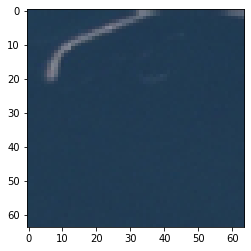

In [10]:
image_water = image.load_img('/content/data/water/SeaLake_245.jpg')
image_water_plot = plt.imshow(image_water)

## Using Image Generator

In [11]:
train_dir = os.path.join("/content/data")

In [12]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range=0.2,
                    zoom_range=0.2,
                    fill_mode = 'nearest',
                    # Data is divided into 20% data test and 80% data training
                    validation_split=0.2)

In [13]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=40,
        class_mode='categorical',
        subset='training')
 
validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=40, 
        class_mode='categorical',
        subset='validation')

Found 4505 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.


## Make models

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [22]:
# compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=1.0000e-04)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [16]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.92 or logs.get('val_accuracy')>=0.92):
      print("\nAccuracy or Validation Accuracy has reached 0.92")
      self.model.stop_training = True
callbacks = myCallback()

In [23]:
# train models with model.fit
history = train_models = model.fit(
      train_generator,
      batch_size=64,  
      epochs=100,
      validation_data=validation_generator,
      validation_steps=5,
      callbacks=[callbacks])

Epoch 1/100
113/113 [==============================] - 202s 2s/step - loss: 1.0717 - accuracy: 0.4435 - val_loss: 0.7644 - val_accuracy: 0.6450
Epoch 2/100
113/113 [==============================] - 200s 2s/step - loss: 0.5081 - accuracy: 0.7097 - val_loss: 0.4786 - val_accuracy: 0.7550
Epoch 3/100
113/113 [==============================] - 201s 2s/step - loss: 0.4802 - accuracy: 0.7345 - val_loss: 0.4990 - val_accuracy: 0.7000
Epoch 4/100
113/113 [==============================] - 201s 2s/step - loss: 0.4605 - accuracy: 0.7501 - val_loss: 0.4533 - val_accuracy: 0.7650
Epoch 5/100
113/113 [==============================] - 202s 2s/step - loss: 0.4374 - accuracy: 0.8064 - val_loss: 0.4920 - val_accuracy: 0.7950
Epoch 6/100
113/113 [==============================] - 201s 2s/step - loss: 0.3847 - accuracy: 0.8402 - val_loss: 0.4056 - val_accuracy: 0.8100
Epoch 7/100
113/113 [==============================] - 201s 2s/step - loss: 0.3370 - accuracy: 0.8604 - val_loss: 0.3663 - val_accuracy:

## Loss and Accuracy Plots During Training and Validation

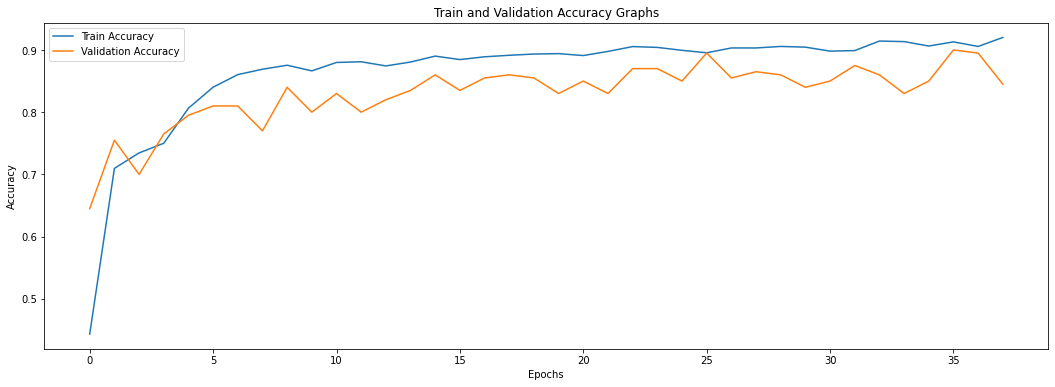

In [24]:
plt.figure(figsize=(18, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy Graphs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

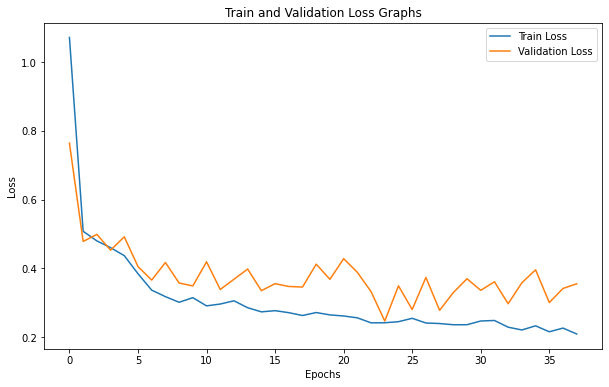

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss Graphs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Saving PW-2014-12-10-Crosswell-water.jpg to PW-2014-12-10-Crosswell-water.jpg
PW-2014-12-10-Crosswell-water.jpg
This picture shows water


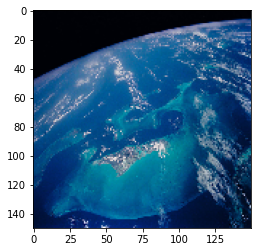

In [27]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('This picture shows cloud')
  elif classes[0,1]!=0:
    print('This picture shows disert')
  elif classes[0,2]!=0:
    print('This picture shows green area')
  elif classes[0,3]!=0:
    print('This picture shows water')
  else:
    print('Unknown image')

## Konversi Model

In [28]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpkdbon8q_/assets


In [29]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)